In [1]:
import tensorflow as tf
from models import decoder, encoder, vae
import matplotlib.pyplot as plt
import pandas as pd
from constants import *
from hyperparameters import *
import pathlib

from utils import data_loading

In [2]:
apes_info = pd.read_csv(APES_INFO_FILEPATH)
all_images_ids, train_ids, validation_ids, test_ids = data_loading.get_image_ids(apes_info, pathlib.Path(DATA_FILEPATH))

In [3]:
dataset = data_loading.load_full_dataset(DATA_FILEPATH, IMAGE_SIZE, all_images_ids)

train_dataset = data_loading.load_specific_dataset(dataset, train_ids, BATCH_SIZE)
validation_dataset = data_loading.load_specific_dataset(dataset, test_ids, BATCH_SIZE)

Found 10000 files belonging to 10000 classes.


In [6]:
yel_back = apes_info.loc[apes_info["Mouth"] == "Bored", "image"].to_list()
gray_back = apes_info.loc[apes_info["Mouth"] == "Grin", "image"].to_list()

img_yel = data_loading.load_specific_dataset(dataset, yel_back, BATCH_SIZE)
img_grey = data_loading.load_specific_dataset(dataset, gray_back, BATCH_SIZE)

In [8]:
decoder_model = decoder.build_decoder(LATENT_DIM)
encoder_model = encoder.build_encoder(LATENT_DIM)

vae_model = vae.VAE(encoder_model, decoder_model, RECONSTRUCTION_LOSS_WEIGHT, KL_LOSS_WEIGHT)
vae_model.load_weights(MODEL_VAE_FILEPATH)

In [14]:
vae_model.predict(img_grey)

23/23 [==============================] - 16s 685ms/step


array([[[[3.66217387e-03, 5.23614371e-03, 6.27014320e-03],
         [1.24493307e-02, 1.67250782e-02, 1.61187388e-02],
         [2.18819007e-02, 2.62461156e-02, 3.35504003e-02],
         ...,
         [1.00869371e-03, 1.90898275e-03, 2.57233088e-03],
         [3.41719948e-03, 4.55728173e-03, 6.37493888e-03],
         [8.21080804e-03, 1.01924883e-02, 1.38015086e-02]],

        [[2.03929390e-04, 4.77181777e-04, 5.66078816e-04],
         [7.98573252e-03, 1.27802687e-02, 1.12085296e-02],
         [2.65448168e-03, 4.59329691e-03, 5.89670055e-03],
         ...,
         [1.20430067e-02, 1.87751688e-02, 1.78926419e-02],
         [1.41017593e-03, 2.12069065e-03, 2.75716209e-03],
         [1.13940751e-03, 1.56977319e-03, 2.38157879e-03]],

        [[4.63652359e-05, 8.70447766e-05, 1.08262539e-04],
         [4.72112675e-04, 7.24695215e-04, 7.71498715e-04],
         [6.97142351e-03, 1.16640106e-02, 1.53127676e-02],
         ...,
         [5.05577661e-02, 6.08731247e-02, 4.48895693e-02],
         [

In [17]:
encoder_model.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv_block (ConvBlock)      (None, 128, 128, 32)         1024      ['input_2[0][0]']             
                                                                                                  
 conv_block_1 (ConvBlock)    (None, 64, 64, 32)           9376      ['conv_block[0][0]']          
                                                                                                  
 conv_block_2 (ConvBlock)    (None, 32, 32, 64)           18752     ['conv_block_1[0][0]']        
                                                                                            

In [16]:
enc_img_grey = encoder_model.predict(img_grey)
enc_img_yel = encoder_model.predict(img_yel)

      8/Unknown - 6s 765ms/step

KeyboardInterrupt: 

In [115]:
yel_m = tf.reduce_mean(enc_img_yel[2], axis=0)
grey_m = tf.reduce_mean(enc_img_grey[2], axis=0)
diff = yel_m - grey_m

In [116]:
s = img_grey.take(1)
s1 = list(s)

t1 = s1[0][0].numpy()

2023-05-20 13:18:35.705148: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-20 13:18:35.705292: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


In [117]:
enc1 = encoder_model(t1.reshape(1, 256, 256, 3))

In [118]:
ot = []
for i in range(11):
    mlt = enc1[2] + diff * i / 10
    dec_mlt = decoder_model(mlt)
    ot.append(dec_mlt)

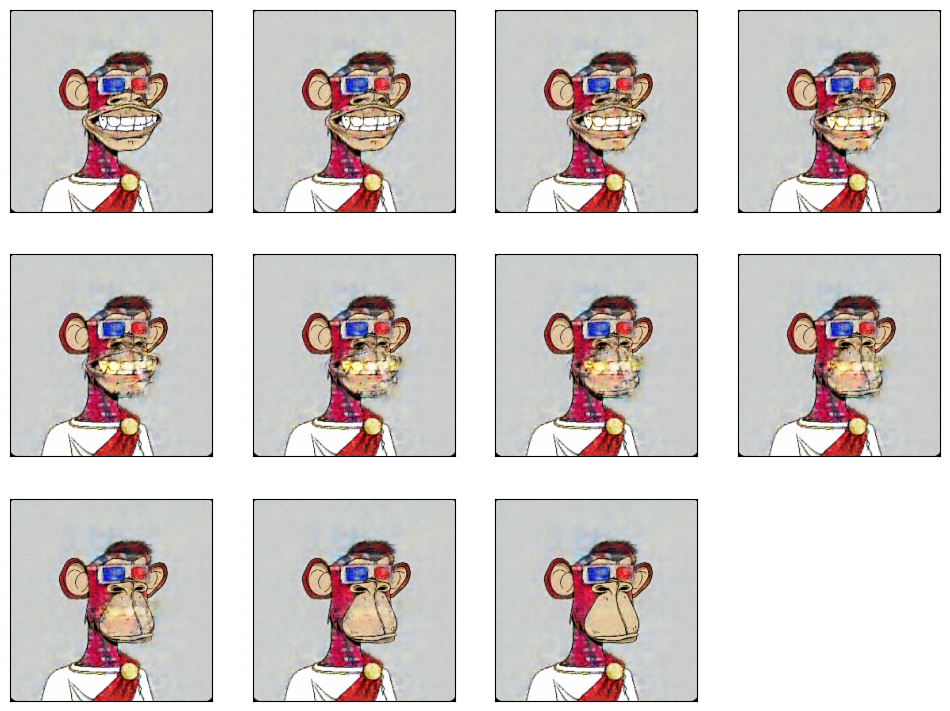

In [121]:
plt.figure(figsize=(12, 9))
for i in range(11):
    plt.subplot(3, 4, i + 1)
    plt.imshow(ot[i][0])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [110]:
res = decoder_model.predict(dec1[2] + diff * 0.9)

1/1 [==============================] - 0s 206ms/step


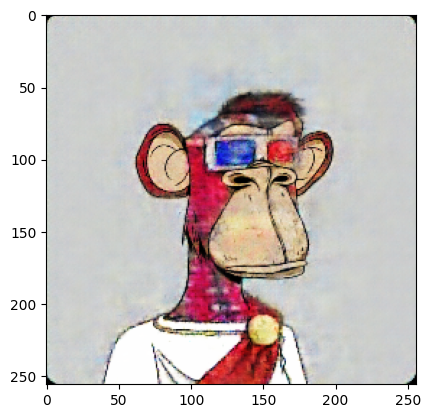

In [111]:
plt.imshow(res[0])

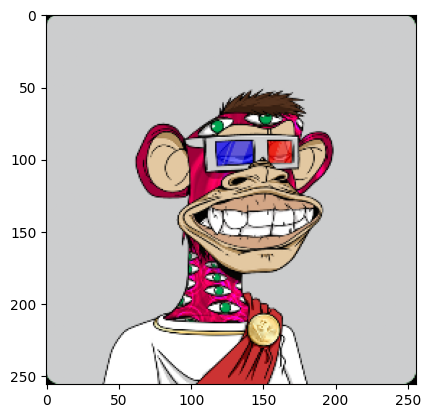

In [112]:
plt.imshow(s1[0][0])

In [25]:
s = dataset.take(2)
s1 = list(s)

t1 = s1[0][0].numpy()
t2 = s1[1][0].numpy()

In [38]:
enc1 = encoder_model(t1.reshape(1, 256, 256, 3))
enc2 = encoder_model(t2.reshape(1, 256, 256, 3))

dec1 = decoder_model(enc1[2])
dec2 = decoder_model(enc2[2])

mlt = enc1[2] * 0.5 + enc2[2] * 0.5
dec_mlt = decoder_model(mlt)

In [40]:
ot = []
for i in range(11):
    mlt = enc1[2] * (i / 10) + enc2[2] * ((10 - i) / 10)
    dec_mlt = decoder_model(mlt)
    ot.append(dec_mlt)

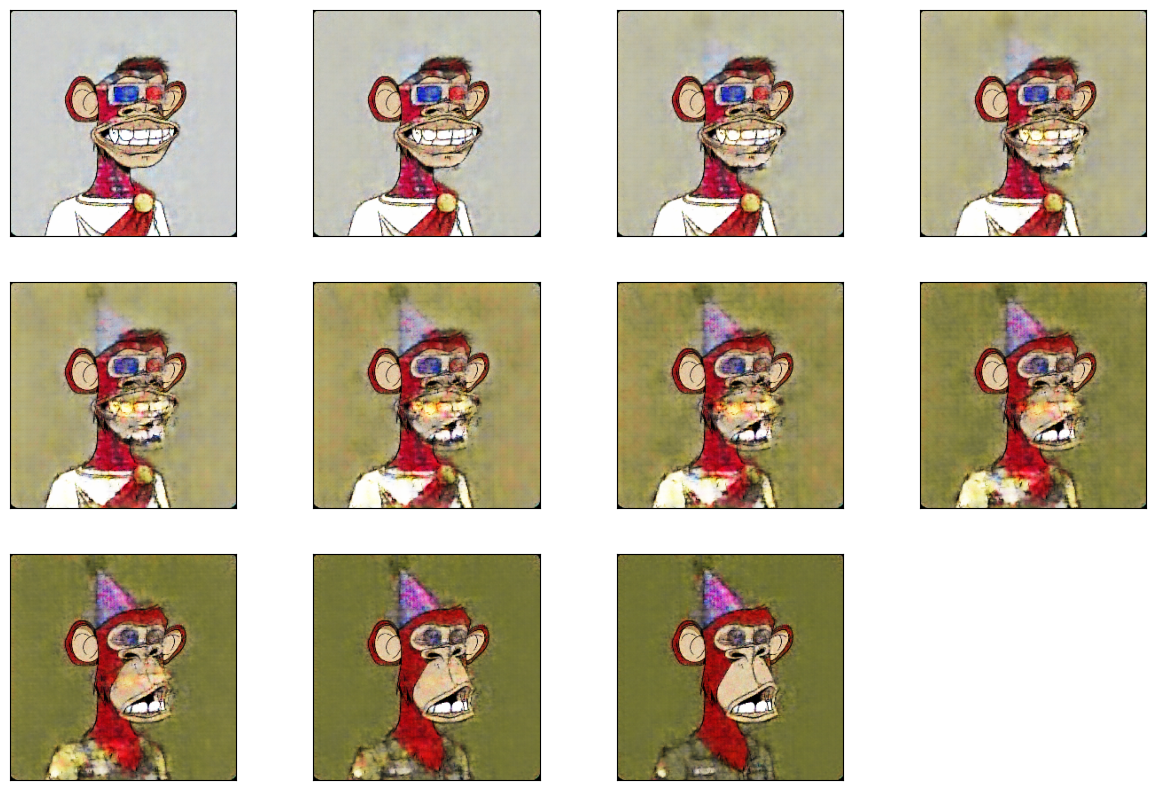

In [48]:
plt.figure(figsize=(15, 10))
for i in range(11):
    plt.subplot(3, 4, i + 1)
    plt.imshow(ot[i][0])
    plt.xticks([])
    plt.yticks([])
plt.show()

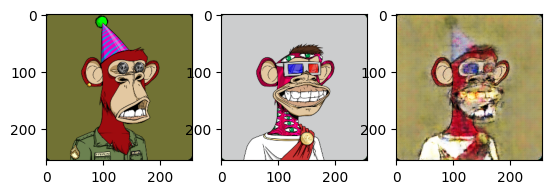

In [39]:
plt.subplot(131)
plt.imshow(t1)
plt.subplot(132)
plt.imshow(t2)
plt.subplot(133)
plt.imshow(dec_mlt[0])